In [159]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
import itertools
from scipy.stats import norm
import scipy.stats
from sklearn.naive_bayes import GaussianNB
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Bài tập trong slide:

In [86]:
D = [2,2,3,4,9,13,14,15]
L = [1,1,1,1,0,0,0,0]

In [87]:
#Build classifier functions
# h = 3

def phii(x,y):
  if (np.absolute(x-y)<=h/2):
    return 1
  else:
    return 0

def PWindow(X,data_train,h):
    V = 1/(8*3)
    scores_list = []
    for i in X:
        score=0
        for j in data_train:
            score+=phii(i,j)
        scores_list.append(score)
    return scores_list

In [88]:
D
h=3
xx = [3]
print(PWindow(xx,D,h))

[4]


In [127]:
XX = np.linspace(0,18,100)
sList = PWindow(XX,D,h)
print(PWindow([11],D,h))

[0]


<BarContainer object of 100 artists>

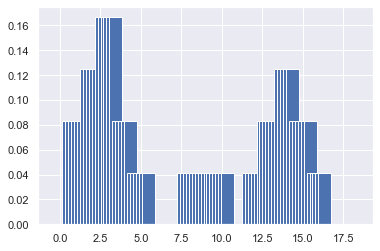

In [90]:
plt.bar(XX,sList)

## Bài tập 1:

In [174]:
#Load data
columnsName = ['Feature1','Feature2']
f = open("classA.txt", "r")
classA = pd.DataFrame(np.array(f.read().split()).astype('float64').reshape(-1,2),columns = columnsName)
f = open("classB.txt", "r")
classB = pd.DataFrame(np.array(f.read().split()).astype('float64').reshape(-1,2),columns = columnsName)

In [175]:
#Merge data
classMerge = pd.concat([classA,classB], keys=['A', 'B']).reset_index().drop('level_1', axis=1).rename(columns = {'level_0': 'Class'})

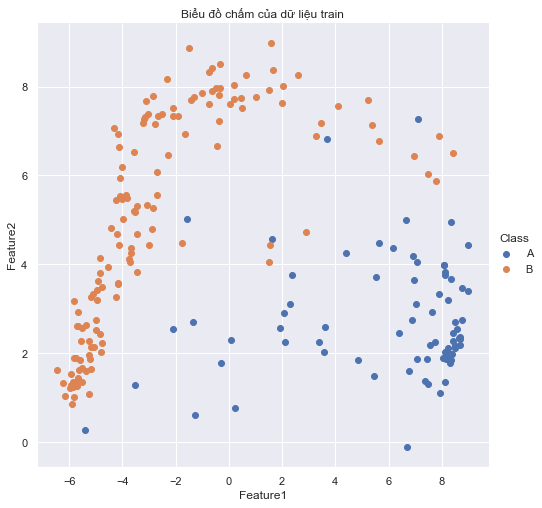

In [177]:
#Plot data
sns.set()
sns.FacetGrid(classMerge, hue="Class", height=7).map(plt.scatter,"Feature1","Feature2",).add_legend()
plt.title('Biểu đồ chấm của dữ liệu train')
plt.show()

In [269]:
#Split train and test
train_set, test_set = train_test_split(classMerge, train_size=0.5)
print(train_set.shape)
print(test_set.shape)

(108, 3)
(108, 3)


In [270]:
classMerge

,Class,Feature1,Feature2
0,A,8.163200,1.882447
1,A,7.022303,3.101321
2,A,8.427595,2.285227
3,A,8.304689,1.779331
4,A,8.403989,1.986639
...,...,...,...
211,B,-2.329644,8.161495
212,B,-2.759244,7.164973
213,B,-2.511243,7.389776
214,B,-2.652514,7.340250


In [271]:
#Build classifier functions
h = 2

def phi(x):
  if ((np.absolute(x)>1/2).any()):
    return 0
  else:
    return 1

def PW(X,data_train):
  scores_list = []
  nA = classA.size
  nB = classB.size
#   print(nA,nB)
  for p in train_set.groupby('Class'):
#     n=len(p[0]['Feature1'])
    score = 0
    for x in p[1][['Feature1','Feature2']].to_numpy():
      score+=phi((X-x)/h)*(nA/(nA+nB))/100
    scores_list.append(score)
#   print(np.argmax(scores_list))
  dic = []
  dic.append(scores_list[0])
  dic.append(scores_list[1])
  dic.append('A' if np.argmax(scores_list)==0 else 'B')
  return dic

In [272]:
#Confusion matrix
predict_table = pd.DataFrame()

predictionA = [PW(np.array([x,y]),train_set)[0] for x, y in test_set[["Feature1","Feature2"]].values]
predictionB = [PW(np.array([x,y]),train_set)[1] for x, y in test_set[["Feature1","Feature2"]].values]
predictionLabel = [PW(np.array([x,y]),train_set)[2] for x, y in test_set[["Feature1","Feature2"]].values]

# print(pd.DataFrame(confusion_matrix(label, prediction), index=['Class A', 'Class B'], columns=['Class A', 'Class B']))

In [274]:
fea1 = list(test_set["Feature1"].values)
fea2 = list(test_set["Feature2"].values)

type(fea1)
predict_table = pd.DataFrame({'Feature1_Test':fea1,'Feature2_Test':fea2,'p(A)':predictionA,'p(B)':predictionB,'Predict':predictionLabel,'RealLabel':list(test_set['Class'].values)})
print(predict_table)

label = list(test_set['Class'].values)
print(pd.DataFrame(confusion_matrix(label,predictionLabel), index=['Class A', 'Class B'], columns=['Class A', 'Class B']))


     Feature1_Test  Feature2_Test      p(A)      p(B) Predict RealLabel
0        -5.381969       2.648733  0.000000  0.052778       B         B
1        -3.451772       5.304778  0.000000  0.045741       B         B
2        -4.947351       3.429878  0.000000  0.038704       B         B
3         1.521592       7.921291  0.000000  0.010556       B         B
4         1.520555       4.052169  0.007037  0.003519       A         B
..             ...            ...       ...       ...     ...       ...
103      -5.405375       0.287369  0.000000  0.007037       B         A
104       8.350394       3.672914  0.010556  0.000000       A         A
105       6.967236       3.642180  0.003519  0.000000       A         A
106       7.904009       6.885696  0.000000  0.010556       B         B
107      -0.462807       6.659511  0.000000  0.000000       A         B

[108 rows x 6 columns]
         Class A  Class B
Class A       34        3
Class B        2       69


In [195]:
for p in train_set.groupby('Class'):
    print(p[1][['Feature1','Feature2']])

    Feature1  Feature2
23  1.609163  4.563730
60  8.356925  1.993947
4   8.403989  1.986639
54  2.074675  2.909612
68 -1.564133  5.015163
37  6.400943  2.455570
62  8.129180  3.757210
8   6.967236  3.642180
9   5.655087  4.481345
67 -3.517951  1.287599
58  2.355983  3.761938
35  7.940685  1.100015
70  8.138721  3.818757
45  8.264942  1.989439
26  8.500410  2.175449
47  6.707810 -0.107688
1   7.022303  3.101321
43  3.701405  6.823521
19  7.073836  4.058323
71  6.675039  5.008189
18  5.529730  3.712709
27 -0.310189  1.793271
2   8.427595  2.285227
64  8.701198  2.329633
59  7.434277  1.884090
72  7.912721  3.343304
50  8.486508  2.713630
66  7.117904  7.276502
7   8.567443  2.551505
17  7.736955  2.257947
56  2.311642  3.099675
42  8.365532  4.952272
5   8.497991  2.166726
20  4.400705  4.267552
30 -1.330388  2.708924
0   8.163200  1.882447
38  3.573577  2.023653
74  8.240776  3.207236
34  6.782901  1.606867
21  6.151442  4.360410
31  4.854433  1.844053
51  8.113488  2.040709
36  7.36917

<ipython-input-182-0c800d53d5d9>:23: UserWarning: No contour levels were found within the data range.
  my_ax.contour( X, Y, Z, 1, alpha = 1, colors = ('blue','red'))


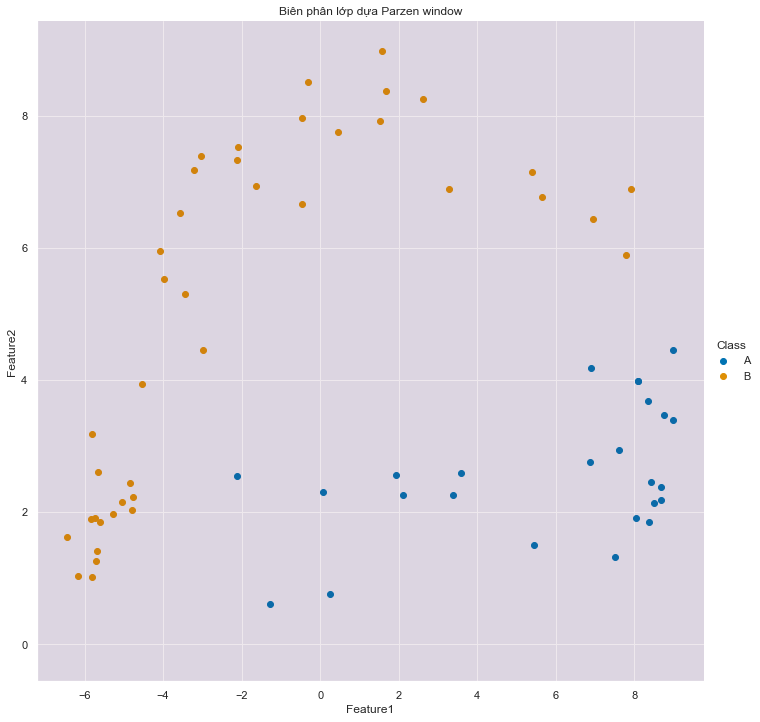

In [182]:
#Plot with boundary contours
N = 100
maxv = classMerge[["Feature1","Feature2"]].max().values
minv = classMerge[["Feature1","Feature2"]].min().values
len = maxv - minv
X = np.linspace(minv[0]-len[0]*0.05, maxv[0]+len[0]*0.05, N)
Y = np.linspace(minv[1]-len[1]*0.05, maxv[1]+len[1]*0.05, N)
X, Y = np.meshgrid(X, Y)

#Configure plot
color_list = ['Blues','Reds']
g = sns.FacetGrid(test_set, hue="Class", height=10, palette = 'colorblind', hue_order=["A","B"]).map(plt.scatter,"Feature1","Feature2",).add_legend()
my_ax = g.ax

#Computing the predicted class function for each value on the grid
zz = np.array( [PW(np.array([xx,yy]).reshape(-1,1),train_set) for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )

#Reshaping the predicted class into the meshgrid shape
Z = zz.reshape(X.shape)

#Plot the filled and boundary contours
my_ax.contourf( X, Y, Z, 1, alpha = .1)
my_ax.contour( X, Y, Z, 1, alpha = 1, colors = ('blue','red'))

# Addd axis and title
my_ax.set_xlabel('Feature1')
my_ax.set_ylabel('Feature2')
my_ax.set_title('Biên phân lớp dựa Parzen window')
plt.show()